In [ ]:
import torch
import requests
import matplotlib.pyplot as plt

In [ ]:
# iris data 다운로드 받기
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
r = requests.get(iris_url)

with open("iris.data", "wb") as f:
    f.write(r.content)

In [ ]:
# iris data 불러오기 및 데이터 포멧 변환
vectors = []
answers = []

with open("iris.data", "r") as f:
    for line in f:
        if len(line.strip()) == 0:
            continue
        items = line.strip().split(",")
        vectors.append([float(i) for i in items[:4]])
        answers.append(items[4])

print(len(vectors))
print(len(answers))

150
150


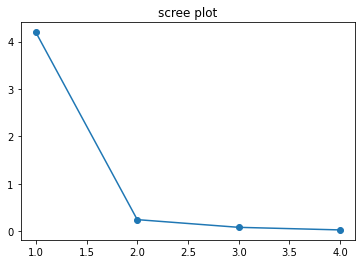

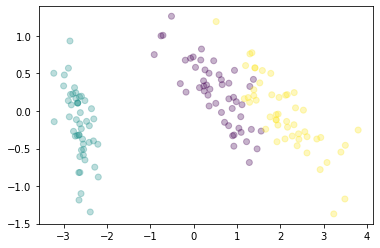

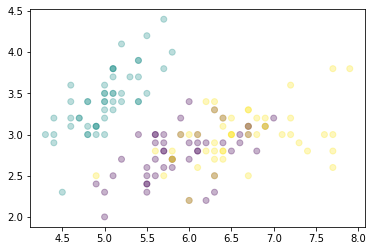

In [ ]:
# 축 옮기기
X = torch.FloatTensor(vectors)
Z = X - X.mean(axis=0)

# Z에서 주성분 찾기

torch.manual_seed(1)

def findPC(Z):
    w = torch.randn(Z.shape[1])
    w = w / (w ** 2).sum() ** 0.5

    lr = 0.1

    for epoch in range(1001):
        w.requires_grad_(True)
        variance = ((Z * w).sum(axis=1) ** 2).mean()

        variance.backward()
        with torch.no_grad():
            w = w + lr * w.grad
            w = w / (w ** 2).sum() ** 0.5

    return w, variance.item()

def PCA(Z, n):
    W, V = [], []
    for _ in range(n):
        w, v = findPC(Z)
        W.append(w.tolist())
        V.append(v)
        Z = Z - (Z * w).sum(axis=1).view(-1,1) * w

    return W, V

def transform(Z, W):
    return Z @ torch.Tensor(W).T

W, V = PCA(Z, 4)

plt.title("scree plot")
plt.plot(range(1, len(V)+1), V, "-o")
plt.show()

K = transform(Z, W)

species = {s: i for i, s in enumerate(set(answers))}

plt.scatter(K[:, 0], K[:, 1], c=[species[a] for a in answers], alpha=0.3)
plt.show()

plt.scatter(X[:, 0], X[:, 1], c=[species[a] for a in answers], alpha=0.3)
plt.show()

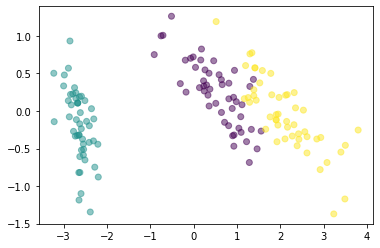

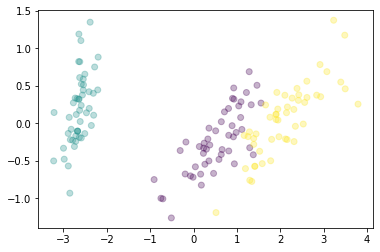

In [ ]:
from sklearn import decomposition

pca = decomposition.PCA(2)
pca.fit(X)
T = pca.transform(X)

plt.scatter(K[:, 0], K[:, 1], c=[species[a] for a in answers], alpha=0.5)
plt.show()

plt.scatter(T[:, 0], T[:, 1], c=[species[a] for a in answers], alpha=0.3)
plt.show()